Shelter Animal Outcomes - Kristen Marenco

In [3]:
import numpy as np

import pandas as pd

In [4]:
raw_df = pd.read_csv('train.csv')

raw_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [5]:
raw_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color'],
      dtype='object')

# Manipulations To Data

Remove 'AnimalID' column

OneHotEncode 'DateTime' into 'Year', 'Month', 'Day', 'Hour0', 'Hour1', 'Hour2', 'Hour3' - separate hour column using hourBins function

Remove 'OutcomeSubtype'

OneHotEncode'AnimalType' into 'Dog' and 'Cat'

OneHotEncode 'SexuponOutcome' into 'NeuteredMale', 'SpayedFemale', 'IntactMale', 'IntactFemale', 'Unknown'

Change 'AgeuponOutcome' to 'AgeinDaysUponOutcome' - values will be in days using ageToDay function

OneHotEncode 'Breed' to 'Pitbull', 'Chihuahua', 'Shepherd', 'Retriever', 'Terrier', 'DomesticShorthair', 'DomesticMediumhair', 'DomesticLonghair', 'Siamese', 'Other' - separate data using breedOrganizer function

OneHotEncode 'Color' to 'Black', 'Brown', 'White', 'Tan', 'Blue', 'Tabby', 'Other' - separate data by using colorOrganizer function

Change 'Name' to a boolean type. True if animal has a name.

Total Number of feature columns should be 33
Total Number of target columns should be 1 ('OutcomeType')

Creating columns: Hour Day Month Year 

In [6]:
from datetime import datetime, time, date

raw_df['Hour'] = raw_df.DateTime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%H'))

raw_df['Day'] = raw_df.DateTime.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%d'))

raw_df['Month']= raw_df.DateTime.apply(lambda x : datetime.strptime(x,  '%Y-%m-%d %H:%M:%S').strftime('%m'))

raw_df['Year']= raw_df.DateTime.apply(lambda x : datetime.strptime(x,  '%Y-%m-%d %H:%M:%S').strftime('%Y'))

In [7]:
def hourBins(hour):
    hour = int(hour)
    if 0<= hour <= 5:
        return 1
    if 6<= hour <= 11:
        return 2
    if 12<= hour <= 17:
        return 3
    else:
        return 4
    
raw_df['Hour'] = raw_df['Hour'].apply(lambda x: hourBins(x))

#check if all bin thresholds are in df
raw_df.Hour.unique()

array([4, 3, 2, 1], dtype=int64)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

OneHotEncoding Hour into Hour0 Hour1 Hour2 Hour3

In [9]:
hr = LabelEncoder()
hr_ohe = OneHotEncoder()

raw_df['Hour'] = hr.fit_transform(raw_df.Hour)

Xh = hr_ohe.fit_transform(raw_df.Hour.values.reshape(-1,1)).toarray()

Xh_OneHot = pd.DataFrame(Xh, columns = ["Hour"+str(int(i)) for i in range(Xh.shape[1])])
raw_df = pd.concat([raw_df, Xh_OneHot], axis=1)

#check for new columns
raw_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Hour,Day,Month,Year,Hour0,Hour1,Hour2,Hour3
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,3,12,02,2014,0.0,0.0,0.0,1.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2,13,10,2013,0.0,0.0,1.0,0.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White,2,31,01,2015,0.0,0.0,1.0,0.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,3,11,07,2014,0.0,0.0,0.0,1.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2,15,11,2013,0.0,0.0,1.0,0.0


OneHotEncoding AnimalType into Dog and Cat

In [10]:
animal = LabelEncoder()
animal_ohe = OneHotEncoder()

raw_df['AnimalType'] = animal.fit_transform(raw_df.AnimalType)

Xa = animal_ohe.fit_transform(raw_df.AnimalType.values.reshape(-1,1)).toarray()

Xa_OneHot = pd.DataFrame(Xa, columns = ["Animal" + str(int(i)) for i in range(Xa.shape[1])])

raw_df = pd.concat([raw_df, Xa_OneHot], axis=1)

raw_df = raw_df.rename(columns = {'Animal0': 'Cat'})
raw_df = raw_df.rename(columns = {'Animal1': 'Dog'})

#check for new columns
raw_df

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color,Hour,Day,Month,Year,Hour0,Hour1,Hour2,Hour3,Cat,Dog
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,1,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White,3,12,02,2014,0.0,0.0,0.0,1.0,0.0,1.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,0,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby,2,13,10,2013,0.0,0.0,1.0,0.0,1.0,0.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,1,Neutered Male,2 years,Pit Bull Mix,Blue/White,2,31,01,2015,0.0,0.0,1.0,0.0,0.0,1.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream,3,11,07,2014,0.0,0.0,0.0,1.0,1.0,0.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,1,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan,2,15,11,2013,0.0,0.0,1.0,0.0,0.0,1.0
5,A677334,Elsa,2014-04-25 13:04:00,Transfer,Partner,1,Intact Female,1 month,Cairn Terrier/Chihuahua Shorthair,Black/Tan,2,25,04,2014,0.0,0.0,1.0,0.0,0.0,1.0
6,A699218,Jimmy,2015-03-28 13:11:00,Transfer,Partner,0,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Tabby,2,28,03,2015,0.0,0.0,1.0,0.0,1.0,0.0
7,A701489,NaN,2015-04-30 17:02:00,Transfer,Partner,0,Unknown,3 weeks,Domestic Shorthair Mix,Brown Tabby,2,30,04,2015,0.0,0.0,1.0,0.0,1.0,0.0
8,A671784,Lucy,2014-02-04 17:17:00,Adoption,NaN,1,Spayed Female,5 months,American Pit Bull Terrier Mix,Red/White,2,04,02,2014,0.0,0.0,1.0,0.0,0.0,1.0
9,A677747,NaN,2014-05-03 07:48:00,Adoption,Offsite,1,Spayed Female,1 year,Cairn Terrier,White,1,03,05,2014,0.0,1.0,0.0,0.0,0.0,1.0


OneHotEncoding SexuponOutcome into NeuteredMale SpayedFemale IntactMale IntactFemale Unknown

In [11]:
def sexUnknown(sex):
    sex = int(sex)
    if sex > 4:
        return 4
    else:
        return sex
#This function is merging the Unknown and Blank values for SexuponOutcome

In [12]:
sex = LabelEncoder()
sex_ohe = OneHotEncoder()

raw_df['SexuponOutcome'] = sex.fit_transform(raw_df['SexuponOutcome'].astype(str))

print(raw_df.SexuponOutcome.unique())

raw_df['SexuponOutcome'] = raw_df['SexuponOutcome'].apply(lambda x: sexUnknown(x))

Xs = sex_ohe.fit_transform(raw_df.SexuponOutcome.values.reshape(-1,1)).toarray()

Xs_OneHot = pd.DataFrame(Xs, columns = ["Sex" + str(int(i)) for i in range(Xs.shape[1])])

raw_df = pd.concat([raw_df, Xs_OneHot], axis=1)

raw_df = raw_df.rename(columns = {'Sex0': 'IntactFemale'})
raw_df = raw_df.rename(columns = {'Sex1': 'IntactMale'})
raw_df = raw_df.rename(columns = {'Sex2': 'NeuteredMale'})
raw_df = raw_df.rename(columns = {'Sex3': 'SpayedFemale'})
raw_df = raw_df.rename(columns = {'Sex4': 'Unknown Sex'})

#check for new columns
#raw_df.head()

[2 3 1 0 4 5]


Changing AgeuponOutcome into AgeinDaysUponOutcome 

In [13]:
def age(age):
    age = str(age) #explicit string
    if not age: #check if blank before casting 
        return -1 #Note: all blank values will be changed to -1
    
    strToarr = age.split(" ")
    if len(strToarr) > 1:
        num = int(strToarr[0])
        date = strToarr[1]

        if "year" in date:
            return num * 365
        elif "month" in date:
            return num * 30
        elif "week" in date:
            return num * 7
        elif "day" in date:
            return num
    else:
        return -1
#This function is converting Age into Age in days

In [14]:
raw_df['AgeuponOutcome'] = raw_df['AgeuponOutcome'].apply(lambda x : age(x))

raw_df = raw_df.rename(columns = {'AgeuponOutcome': 'AgeinDaysUponOutcome'})

raw_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeinDaysUponOutcome,Breed,Color,...,Hour1,Hour2,Hour3,Cat,Dog,IntactFemale,IntactMale,NeuteredMale,SpayedFemale,Unknown Sex
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,1,2,365,Shetland Sheepdog Mix,Brown/White,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,0,3,365,Domestic Shorthair Mix,Cream Tabby,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,1,2,730,Pit Bull Mix,Blue/White,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,0,1,21,Domestic Shorthair Mix,Blue Cream,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,1,2,730,Lhasa Apso/Miniature Poodle,Tan,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


OneHotEncoding Breed into Pitbull Chihuahua Shepherd Retriever Terrier DomesticShorthair DomesticMediumhair DomesticLonghair Siamese Other

In [15]:
def breedOrganizer(breed):
    breed = str(breed) #explicit string
    
    if "Pit Bull" in breed:
        return 0
    elif "Chihuahua" in breed:
        return 1
    elif "Shepherd" in breed:
        return 2
    elif "Retriever" in breed:
        return 3
    elif "Terrier" in breed:
        return 4
    elif "Domestic Shorthair" in breed:
        return 5
    elif "Domestic Medium Hair" in breed:
        return 6
    elif "Domestic Longhair" in breed: 
        return 7
    elif "Siamese" in breed:
        return 8
    else:
        return 9
    
#This function is separating the Breed Category into the top breeds for Cat/Dog

In [16]:
breed = LabelEncoder()
Xb_ohe = OneHotEncoder()

raw_df['Breed'] = raw_df['Breed'].apply(lambda x : breedOrganizer(x))

Xb = Xb_ohe.fit_transform(raw_df.Breed.values.reshape(-1,1)).toarray()

Xb_OneHot = pd.DataFrame(Xb, columns = ["Pit Bull", "Chihuahua", "Shepherd", "Retriever", "Terrier", "DomesticShorthair", "DomesticMediumHair", "DomesticLonghair", "Siamese", "Other Breed"])

raw_df = pd.concat([raw_df, Xb_OneHot], axis=1)

raw_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeinDaysUponOutcome,Breed,Color,...,Pit Bull,Chihuahua,Shepherd,Retriever,Terrier,DomesticShorthair,DomesticMediumHair,DomesticLonghair,Siamese,Other Breed
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,1,2,365,9,Brown/White,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,0,3,365,5,Cream Tabby,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,1,2,730,0,Blue/White,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,0,1,21,5,Blue Cream,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,1,2,730,9,Tan,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


OneHotEncoding Color into Black Brown White Tan Blue Tabby Other

In [17]:
def colorOrganizer(color):
    color = str(color) #explicit string
    
    if "Black" in color:
        return 0
    elif "Brown" in color:
        return 1
    elif "White" in color:
        return 2
    elif "Tan" in color:
        return 3
    elif "Blue" in color:
        return 4
    elif "Tabby" in color:
        return 5
    else:
        return 6

#This function is separating the Color column into the top colors/other

In [18]:
color = LabelEncoder()
Xc_ohe = OneHotEncoder()

raw_df['Color'] = raw_df['Color'].apply(lambda x : colorOrganizer(x))

Xc = Xc_ohe.fit_transform(raw_df.Color.values.reshape(-1,1)).toarray()

Xc_OneHot = pd.DataFrame(Xc, columns = ["Black", "Brown", "White", "Tan", "Blue", "Tabby", "Other Color"])

raw_df = pd.concat([raw_df, Xc_OneHot], axis=1)

raw_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeinDaysUponOutcome,Breed,Color,...,DomesticLonghair,Siamese,Other Breed,Black,Brown,White,Tan,Blue,Tabby,Other Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,1,2,365,9,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,0,3,365,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,1,2,730,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,0,1,21,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,1,2,730,9,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Changing Name column into a boolean type

In [19]:
def nameToBool(name):
    name = str(name) #explicit string
    
    if len(name) > 3: #animal has a name
            return 1
    else:
        return 0 #animal does not have name
#This function converts the Name column into a boolean column. If true, the animal has a name.

In [20]:
name = LabelEncoder()
Xn_ohe = OneHotEncoder()

raw_df['Name'] = raw_df['Name'].apply(lambda x : nameToBool(x))

raw_df.head()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeinDaysUponOutcome,Breed,Color,...,DomesticLonghair,Siamese,Other Breed,Black,Brown,White,Tan,Blue,Tabby,Other Color
0,A671945,1,2014-02-12 18:22:00,Return_to_owner,NaN,1,2,365,9,1,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,A656520,1,2013-10-13 12:44:00,Euthanasia,Suffering,0,3,365,5,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,A686464,1,2015-01-31 12:28:00,Adoption,Foster,1,2,730,0,2,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,A683430,0,2014-07-11 19:09:00,Transfer,Partner,0,1,21,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,A667013,0,2013-11-15 12:52:00,Transfer,Partner,1,2,730,9,3,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Removing Unnecessary Columns 

    AnimalID DateTime Hour OutcomeSubtype AnimalType SexuponOutcome AgeuponOutcome Breed Color 

In [21]:
raw_df.columns

Index(['AnimalID', 'Name', 'DateTime', 'OutcomeType', 'OutcomeSubtype',
       'AnimalType', 'SexuponOutcome', 'AgeinDaysUponOutcome', 'Breed',
       'Color', 'Hour', 'Day', 'Month', 'Year', 'Hour0', 'Hour1', 'Hour2',
       'Hour3', 'Cat', 'Dog', 'IntactFemale', 'IntactMale', 'NeuteredMale',
       'SpayedFemale', 'Unknown Sex', 'Pit Bull', 'Chihuahua', 'Shepherd',
       'Retriever', 'Terrier', 'DomesticShorthair', 'DomesticMediumHair',
       'DomesticLonghair', 'Siamese', 'Other Breed', 'Black', 'Brown', 'White',
       'Tan', 'Blue', 'Tabby', 'Other Color'],
      dtype='object')

In [22]:
clean_df = pd.DataFrame(raw_df, columns = ['Name', 'OutcomeType', 'AgeinDaysUponOutcome',
       'Day', 'Month', 'Year', 'Hour0', 'Hour1', 'Hour2',
       'Hour3', 'Cat', 'Dog', 'IntactFemale', 'IntactMale', 'NeuteredMale',
       'SpayedFemale', 'Unknown Sex', 'Pit Bull', 'Chihuahua', 'Shepherd',
       'Retriever', 'Terrier', 'DomesticShorthair', 'DomesticMediumHair',
       'DomesticLonghair', 'Siamese', 'Other Breed', 'Black', 'Brown', 'White',
       'Tan', 'Blue', 'Tabby', 'Other Color'])

New DataFrame after Manipulations To Data is clead_df

In [23]:
clean_df.columns

Index(['Name', 'OutcomeType', 'AgeinDaysUponOutcome', 'Day', 'Month', 'Year',
       'Hour0', 'Hour1', 'Hour2', 'Hour3', 'Cat', 'Dog', 'IntactFemale',
       'IntactMale', 'NeuteredMale', 'SpayedFemale', 'Unknown Sex', 'Pit Bull',
       'Chihuahua', 'Shepherd', 'Retriever', 'Terrier', 'DomesticShorthair',
       'DomesticMediumHair', 'DomesticLonghair', 'Siamese', 'Other Breed',
       'Black', 'Brown', 'White', 'Tan', 'Blue', 'Tabby', 'Other Color'],
      dtype='object')

In [24]:
clean_df.head()

,Name,OutcomeType,AgeinDaysUponOutcome,Day,Month,Year,Hour0,Hour1,Hour2,Hour3,...,DomesticLonghair,Siamese,Other Breed,Black,Brown,White,Tan,Blue,Tabby,Other Color
0,1,Return_to_owner,365,12,02,2014,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,Euthanasia,365,13,10,2013,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,Adoption,730,31,01,2015,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,Transfer,21,11,07,2014,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,Transfer,730,15,11,2013,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [25]:
features = ['Name', 'AgeinDaysUponOutcome', 'Day', 'Month', 'Year',
       'Hour0', 'Hour1', 'Hour2', 'Hour3', 'Cat', 'Dog', 'IntactFemale',
       'IntactMale', 'NeuteredMale', 'SpayedFemale', 'Unknown Sex', 'Pit Bull',
       'Chihuahua', 'Shepherd', 'Retriever', 'Terrier', 'DomesticShorthair',
       'DomesticMediumHair', 'DomesticLonghair', 'Siamese', 'Other Breed',
       'Black', 'Brown', 'White', 'Tan', 'Blue', 'Tabby', 'Other Color']

features_len = len(features)

animal_df = clean_df[features]

animal_df = pd.DataFrame(animal_df)

print("Number of features in animal_df (the feature matrix):", features_len)

Number of features in animal_df (the feature matrix): 33


In [26]:
target = clean_df['OutcomeType']

t = LabelEncoder()
clean_df['OutcomeType'] = t.fit_transform(clean_df.OutcomeType)

target = clean_df['OutcomeType']


In [27]:
animal_df.head()

#null_columns=animal_df.columns[animal_df.isnull().any()]
#animal_df[null_columns].isnull().sum()

,Name,AgeinDaysUponOutcome,Day,Month,Year,Hour0,Hour1,Hour2,Hour3,Cat,...,DomesticLonghair,Siamese,Other Breed,Black,Brown,White,Tan,Blue,Tabby,Other Color
0,1,365,12,02,2014,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,365,13,10,2013,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,730,31,01,2015,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,21,11,07,2014,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0,730,15,11,2013,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Normalizing Features

In [28]:
from sklearn import preprocessing

feat_nparr = preprocessing.scale(animal_df)

animal_df = pd.DataFrame(feat_nparr, columns = animal_df.columns)

animal_df.head()

,Name,AgeinDaysUponOutcome,Day,Month,Year,Hour0,Hour1,Hour2,Hour3,Cat,...,DomesticLonghair,Siamese,Other Breed,Black,Brown,White,Tan,Blue,Tabby,Other Color
0,0.698276,-0.395879,-0.421688,-1.409043,-0.580974,-0.120091,-0.428535,-1.356201,2.114098,-0.844954,...,-0.144676,-0.125583,1.837992,-0.654963,1.888782,-0.509057,-0.189651,-0.204009,-0.207858,-0.434756
1,0.698276,-0.395879,-0.307667,0.879415,-1.929785,-0.120091,-0.428535,0.737354,-0.473015,1.183497,...,-0.144676,-0.125583,-0.544072,-0.654963,-0.529442,-0.509057,-0.189651,-0.204009,4.810971,-0.434756
2,0.698276,-0.058741,1.744707,-1.695100,0.767836,-0.120091,-0.428535,0.737354,-0.473015,-0.844954,...,-0.144676,-0.125583,-0.544072,-0.654963,-0.529442,1.964417,-0.189651,-0.204009,-0.207858,-0.434756
3,-1.432099,-0.713620,-0.535709,0.021244,-0.580974,-0.120091,-0.428535,-1.356201,2.114098,1.183497,...,-0.144676,-0.125583,-0.544072,-0.654963,-0.529442,-0.509057,-0.189651,4.901750,-0.207858,-0.434756
4,-1.432099,-0.058741,-0.079626,1.165473,-1.929785,-0.120091,-0.428535,0.737354,-0.473015,-0.844954,...,-0.144676,-0.125583,1.837992,-0.654963,-0.529442,-0.509057,5.272836,-0.204009,-0.207858,-0.434756


Split Dataset into Train and Test sets

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(animal_df, target, test_size = 0.25, random_state = 3)

## XGBoost Classifier

In [30]:
from xgboost import XGBClassifier

import warnings; warnings.simplefilter('ignore')

xg = XGBClassifier()

xg.fit(X_train, y_train)

xg_y_predict = xg.predict(X_test)

xg_proba = xg.predict_proba(X_test)

In [31]:
# submission_XG = pd.DataFrame()

# submission_XG['y_test'] = y_test

# submission_XG['xg_pred'] = xg_y_predict

# submission_XG['xg_proba'] = xg_proba[:,0]

# submission_XG['xg_proba1'] = xg_proba[:,1]

# submission_XG['xg_proba2'] = xg_proba[:,2]

# submission_XG['xg_proba3'] = xg_proba[:,3]

# submission_XG['xg_proba4'] = xg_proba[:,4]

# submission_XG.to_csv("XGBoost_Probability.csv")

In [32]:
from sklearn import metrics

In [33]:
from sklearn.metrics import accuracy_score

accuracy_xg = accuracy_score(y_test, xg_y_predict)

print("The accuracy score of XGBoost is: ", accuracy_xg *100, "%")

The accuracy score of XGBoost is:  65.674098458776 %


Cross Validation for XGBoost

In [34]:
from sklearn.model_selection import cross_val_score

In [35]:
cv_xgb_ac = cross_val_score(xg, X_train, y_train, cv = 10, scoring = 'accuracy')

print("The accuracy score of XGBoost is: ", cv_xgb_ac*100, "%")

cv_xgb_ac_mean = cv_xgb_ac.mean()



print("\n")
print("The mean accuracy score of XGBoost is: ", cv_xgb_ac_mean*100, "%")

The accuracy score of XGBoost is:  [64.70588235 65.75274177 64.8554337  66.05184447 64.7557328  65.78553616
 65.46906188 64.62075848 64.58541459 64.36781609] %


The mean accuracy score of XGBoost is:  65.09502222909668 %


Calculating ROC Curve for XGBoost

In [48]:
fpr_xg, tpr_xg, thresholds = metrics.roc_curve(y_test, xg_y_predict, pos_label =1)

print("False Positive Rate for XGBoost ", fpr_xg)

print("\n", "True Positive Rate for XGBoost ", tpr_xg)

AUC_xg = metrics.auc(fpr_xg, tpr_xg)

print("\n", "Area Under the Curve for XGBoost ", AUC_xg)

False Positive Rate for XGBoost  [0.         0.28379804 0.45139412 0.46495855 1.        ]

 True Positive Rate for XGBoost  [0.         0.8125     0.85416667 0.95833333 1.        ]

 Area Under the Curve for XGBoost  0.7911438708867118


In [45]:
fpr_xg0, tpr_xg0, thresholds = metrics.roc_curve(y_test, xg_proba[:,0], pos_label=1)
#print("False Postive Rate for XGBoost probability of OutcomeType 0 ", fpr_xg0)
#print("\n", "True Positive Rate for XGBoost probabilty of OutcomeType 0 ", tpr_xg0)
fpr_xg1, tpr_xg1, thresholds = metrics.roc_curve(y_test, xg_proba[:,1], pos_label=1)
#print("False Postive Rate for XGBoost probability of OutcomeType 1 ", fpr_xg1)
#print("\n", "True Positive Rate for XGBoost probabilty of OutcomeType 1 ", tpr_xg1)
fpr_xg2, tpr_xg2, thresholds = metrics.roc_curve(y_test, xg_proba[:,2], pos_label=1)
#print("False Postive Rate for XGBoost probability of OutcomeType 2 ", fpr_xg2)
#print("\n", "True Positive Rate for XGBoost probabilty of OutcomeType 2 ", tpr_xg2)
fpr_xg3, tpr_xg3, thresholds = metrics.roc_curve(y_test, xg_proba[:,3], pos_label=1)
#print("False Postive Rate for XGBoost probability of OutcomeType 3 ", fpr_xg3)
#print("\n", "True Positive Rate for XGBoost probabilty of OutcomeType 3 ", tpr_xg3)
fpr_xg4, tpr_xg4, thresholds = metrics.roc_curve(y_test, xg_proba[:,4], pos_label=1)
#print("False Postive Rate for XGBoost probability of OutcomeType 4 ", fpr_xg4)
#print("\n", "True Positive Rate for XGBoost probabilty of OutcomeType 4 ", tpr_xg4)
AUC_xg0 = metrics.auc(fpr_xg0, tpr_xg0)
print("\n", "Area Under the Curve for XGBoost probability of Outcome Type 0", AUC_xg0)
AUC_xg1 = metrics.auc(fpr_xg1, tpr_xg1)
print("\n", "Area Under the Curve for XGBoost probability of Outcome Type 1", AUC_xg1)
AUC_xg2 = metrics.auc(fpr_xg2, tpr_xg2)
print("\n", "Area Under the Curve for XGBoost probability of Outcome Type 2", AUC_xg2)
AUC_xg3 = metrics.auc(fpr_xg3, tpr_xg3)
print("\n", "Area Under the Curve for XGBoost probability of Outcome Type 3", AUC_xg3)
AUC_xg4 = metrics.auc(fpr_xg4, tpr_xg4)
print("\n", "Area Under the Curve for XGBoost probability of Outcome Type 4", AUC_xg4)


 Area Under the Curve for XGBoost probability of Outcome Type 0 0.17684626978146195

 Area Under the Curve for XGBoost probability of Outcome Type 1 0.8541038683747801

 Area Under the Curve for XGBoost probability of Outcome Type 2 0.7234112032152725

 Area Under the Curve for XGBoost probability of Outcome Type 3 0.2389977392614921

 Area Under the Curve for XGBoost probability of Outcome Type 4 0.8027819643305701


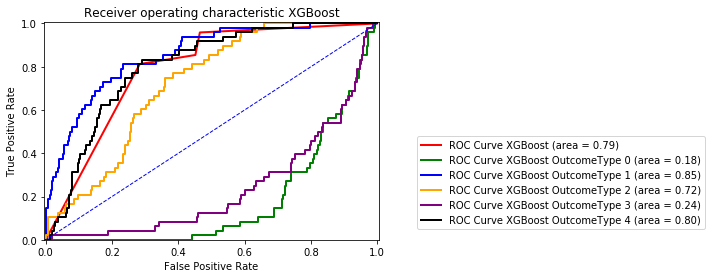

In [46]:
import matplotlib.pyplot as plt


%matplotlib inline

plt.figure()

plt.plot(fpr_xg, tpr_xg, color='red', lw=2, label='ROC Curve XGBoost (area = %0.2f)' % AUC_xg)

plt.plot(fpr_xg0, tpr_xg0, color='green', lw=2, label='ROC Curve XGBoost OutcomeType 0 (area = %0.2f)' % AUC_xg0)
plt.plot(fpr_xg1, tpr_xg1, color='blue', lw=2, label='ROC Curve XGBoost OutcomeType 1 (area = %0.2f)' % AUC_xg1)
plt.plot(fpr_xg2, tpr_xg2, color='orange', lw=2, label='ROC Curve XGBoost OutcomeType 2 (area = %0.2f)' % AUC_xg2)
plt.plot(fpr_xg3, tpr_xg3, color='purple', lw=2, label='ROC Curve XGBoost OutcomeType 3 (area = %0.2f)' % AUC_xg3)
plt.plot(fpr_xg4, tpr_xg4, color='black', lw=2, label='ROC Curve XGBoost OutcomeType 4 (area = %0.2f)' % AUC_xg4)


#Random Guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.005])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic XGBoost')
plt.legend(loc="best")
plt.legend(bbox_to_anchor=(1.1,.5))

plt.savefig('ROC_XGBoost.jpg')

Feature Importance for XGBoost 

Reference: https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/

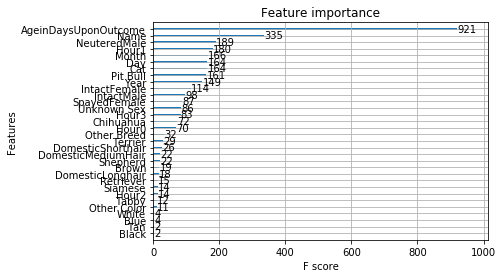

In [47]:
from xgboost import plot_importance
from matplotlib import pyplot

%matplotlib inline

plot_importance(xg)

pyplot.show()

Feature Selection for XGBoost

In [48]:
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [49]:
thresholds = sort(xg.feature_importances_)

for thresh in thresholds: 

    selection = SelectFromModel(xg, threshold = thresh, prefit=True)
    select_X_train = selection.transform(X_train)

    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)

    select_X_test = selection.transform(X_test)
    pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Thresh=0.000, n=33, Accuracy: 65.67%
Thresh=0.001, n=32, Accuracy: 65.67%
Thresh=0.001, n=32, Accuracy: 65.67%
Thresh=0.001, n=30, Accuracy: 65.55%
Thresh=0.001, n=30, Accuracy: 65.55%
Thresh=0.003, n=28, Accuracy: 65.66%
Thresh=0.004, n=27, Accuracy: 65.75%
Thresh=0.004, n=26, Accuracy: 65.70%
Thresh=0.004, n=26, Accuracy: 65.70%
Thresh=0.005, n=24, Accuracy: 65.61%
Thresh=0.005, n=23, Accuracy: 65.75%
Thresh=0.006, n=22, Accuracy: 65.52%
Thresh=0.007, n=21, Accuracy: 65.69%
Thresh=0.007, n=21, Accuracy: 65.69%
Thresh=0.008, n=19, Accuracy: 65.61%
Thresh=0.009, n=18, Accuracy: 65.57%
Thresh=0.010, n=17, Accuracy: 65.63%
Thresh=0.021, n=16, Accuracy: 65.61%
Thresh=0.022, n=15, Accuracy: 64.85%
Thresh=0.025, n=14, Accuracy: 64.52%
Thresh=0.026, n=13, Accuracy: 64.33%
Thresh=0.026, n=12, Accuracy: 64.48%
Thresh=0.030, n=11, Accuracy: 64.15%
Thresh=0.035, n=10, Accuracy: 61.98%
Thresh=0.045, n=9, Accuracy: 59.58%
Thresh=0.049, n=8, Accuracy: 59.57%
Thresh=0.050, n=7, Accuracy: 59.66%
Thre

Performing PCA 

In [59]:
from sklearn.preprocessing import StandardScaler

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(animal_df, target, test_size = 0.25, random_state = 3)

scaler = StandardScaler()

scaler.fit(X_train_p)

X_train_p = scaler.transform(X_train_p)

X_test_p = scaler.transform(X_test_p)

In [60]:
from sklearn.decomposition import PCA

pca = PCA(.95)

pca.fit(X_train_p)

X_train_p = pca.transform(X_train_p)

X_test_p = pca.transform(X_test_p)

In [61]:
xg_pca = XGBClassifier()

xg_pca.fit(X_train_p, y_train_p)

xg_pca.predict(X_test_p)

xg_pca_score = xg_pca.score(X_test_p, y_test_p)

print("The accuracy of XGBoost after PCA is: ", xg_pca_score*100 ,"%")

The accuracy of XGBoost after PCA is:  64.29747119557085 %


## Random Forest Classifier

Trying different amount of n_estimators for Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

for n in range(20,35):
    n = n + 1
    model = RandomForestClassifier(n_estimators = n, bootstrap = True, random_state = 2)
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    
    score = accuracy_score(y_test, pred)
    print("Accuracy value for n_estimators = ", n, " is: ", score*100, "%")


Accuracy value for n_estimators =  21  is:  63.354780787071675 %
Accuracy value for n_estimators =  22  is:  63.41463414634146 %
Accuracy value for n_estimators =  23  is:  63.63908424360317 %
Accuracy value for n_estimators =  24  is:  63.758790962142754 %
Accuracy value for n_estimators =  25  is:  63.63908424360317 %
Accuracy value for n_estimators =  26  is:  63.69893760287296 %
Accuracy value for n_estimators =  27  is:  63.609157563968274 %
Accuracy value for n_estimators =  28  is:  63.93835103995211 %
Accuracy value for n_estimators =  29  is:  63.90842436031722 %
Accuracy value for n_estimators =  30  is:  63.953314379769566 %
Accuracy value for n_estimators =  31  is:  64.04309441867426 %
Accuracy value for n_estimators =  32  is:  63.87849768068234 %
Accuracy value for n_estimators =  33  is:  64.08798443812658 %
Accuracy value for n_estimators =  34  is:  63.80368098159509 %
Accuracy value for n_estimators =  35  is:  63.7139009426904 %


In [65]:
rf = RandomForestClassifier(n_estimators=31, bootstrap = True, random_state=2)

rf.fit(X_train, y_train)

rf_y_predict = rf.predict(X_test)

print(rf_y_predict)

rf_score = accuracy_score(y_test, rf_y_predict)

print("Random Forest Accuracy: ", rf_score*100, "%")

[4 0 0 ... 0 3 0]
Random Forest Accuracy:  64.04309441867426 %


Cross Validation for Random Forest

In [66]:
cv_rf = cross_val_score(rf, X_train, y_train, cv = 10, scoring='accuracy')

print(cv_rf)

cv_rf_mean = cv_rf.mean()

print("\n The mean accuracy score: ", cv_rf_mean*100, "%")

[0.62961117 0.61665005 0.62163509 0.63609172 0.63110668 0.62543641
 0.63023952 0.60578842 0.62437562 0.63618191]

 The mean accuracy score:  62.57116602362878 %


Calculating Probablilty of OutcomeType

In [67]:
rf_pred = rf.predict(X_test)

rf_proba = rf.predict_proba(X_test)

# This line prints the "actual label" of the testing set:
print(y_test)

# This line prints the "predicted label" for the testing set:
print(rf_pred)

# This line prints the "estimated likelihood of both label" for the testing set:
print(rf_proba)

# This line prints the "estimated likelihood of label=1" for the testing set:
print(rf_proba[:,1])

19716    4
6872     0
2517     0
4239     0
14565    3
21545    0
7283     0
11090    0
5187     4
24832    4
4115     3
1384     3
4833     0
24647    4
2374     4
24479    4
25282    0
12238    0
10349    4
22080    4
21507    0
15927    0
9023     3
23998    4
24983    3
24503    0
10011    0
19010    2
20620    0
16701    0
        ..
14122    3
17438    3
2323     3
18339    4
25753    4
7575     3
23837    4
5281     0
24175    4
17447    0
13598    3
10160    4
14465    2
10525    0
529      0
4727     0
7521     4
11144    3
20890    4
9595     4
21812    0
12404    3
7131     0
4063     0
1993     4
42       4
15001    0
15639    4
10487    0
23424    3
Name: OutcomeType, Length: 6683, dtype: int64
[4 0 0 ... 0 3 0]
[[0.09677419 0.         0.         0.         0.90322581]
 [0.74193548 0.         0.         0.06451613 0.19354839]
 [0.4516129  0.         0.06451613 0.12903226 0.35483871]
 ...
 [0.74193548 0.         0.         0.06451613 0.19354839]
 [0.29032258 0.         0.19

In [68]:
# submission = pd.DataFrame()

# submission['y_test'] = y_test

# submission['rf_pred'] = rf_pred

# submission['rf_proba0'] = rf_proba[:,0]

# submission['rf_proba1'] = rf_proba[:,1]

# submission['rf_proba2'] = rf_proba[:,2]

# submission['rf_proba3'] = rf_proba[:,3]

# submission['rf_proba4'] = rf_proba[:,4]

# submission.to_csv("Random_Forest_Probability.csv")

Calculating ROC Curve for Random Forest

In [69]:
fpr_rf, tpr_rf, thresholds = metrics.roc_curve(y_test, rf_pred, pos_label=1)

fpr_rf0, tpr_rf0, thresholds = metrics.roc_curve(y_test, rf_proba[:,0], pos_label=1)
#print(fpr_rf)
#print(tpr_rf)
fpr_rf1, tpr_rf1, thresholds = metrics.roc_curve(y_test, rf_proba[:,1], pos_label=1)
fpr_rf2, tpr_rf2, thresholds = metrics.roc_curve(y_test, rf_proba[:,2], pos_label=1)
fpr_rf3, tpr_rf3, thresholds = metrics.roc_curve(y_test, rf_proba[:,3], pos_label=1)
fpr_rf4, tpr_rf4, thresholds = metrics.roc_curve(y_test, rf_proba[:,4], pos_label=1)

AUC_rf = metrics.auc(fpr_rf, tpr_rf)
AUC_rf0 = metrics.auc(fpr_rf0, tpr_rf0)
AUC_rf1 = metrics.auc(fpr_rf1, tpr_rf1)
AUC_rf2 = metrics.auc(fpr_rf2, tpr_rf2)
AUC_rf3 = metrics.auc(fpr_rf3, tpr_rf3)
AUC_rf4 = metrics.auc(fpr_rf4, tpr_rf4)
#print(AUC_rf)

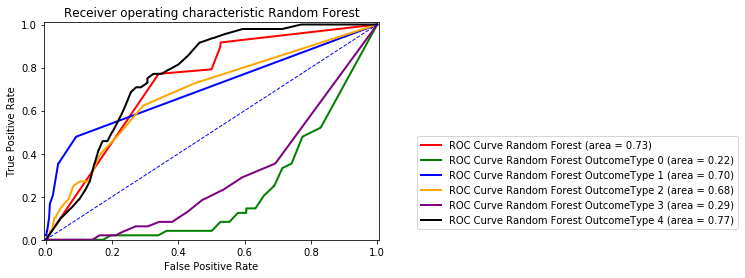

In [72]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label='ROC Curve Random Forest (area = %0.2f)' % AUC_rf)

plt.plot(fpr_rf0, tpr_rf0, color='green', lw=2, label='ROC Curve Random Forest OutcomeType 0 (area = %0.2f)' % AUC_rf0)
plt.plot(fpr_rf1, tpr_rf1, color='blue', lw=2, label='ROC Curve Random Forest OutcomeType 1 (area = %0.2f)' % AUC_rf1)
plt.plot(fpr_rf2, tpr_rf2, color='orange', lw=2, label='ROC Curve Random Forest OutcomeType 2 (area = %0.2f)' % AUC_rf2)
plt.plot(fpr_rf3, tpr_rf3, color='purple', lw=2, label='ROC Curve Random Forest OutcomeType 3 (area = %0.2f)' % AUC_rf3)
plt.plot(fpr_rf4, tpr_rf4, color='black', lw=2, label='ROC Curve Random Forest OutcomeType 4 (area = %0.2f)' % AUC_rf4)


#Random Guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Random Forest')
plt.legend(loc="lower right")

plt.legend(loc="best")
plt.legend(bbox_to_anchor=(1.1,.5))

#plt.savefig('ROC_RF.jpg')

plt.show()

Feature Importance for Random Forest

In [56]:
rf_feature_importances = pd.DataFrame(rf.feature_importances_ * 100, index = X_train.columns, columns = ['importance']).sort_values('importance', ascending = False)

rf_feature_importances

#.to_csv("Random Forest Feature Importance.csv")

Feature Selection for Random Forest Classifier

https://chrisalbon.com/machine_learning/trees_and_forests/feature_selection_using_random_forest/

In [44]:
from sklearn.feature_selection import SelectFromModel

In [46]:
for feature in zip(features, rf.feature_importances_):
    print(feature)

('Name', 0.04210198401774244)
('AgeinDaysUponOutcome', 0.2193663979362218)
('Day', 0.19284215946928587)
('Month', 0.13780146412115835)
('Year', 0.06009493839920733)
('Hour0', 0.006957221429653603)
('Hour1', 0.011904840566708525)
('Hour2', 0.011753901519958178)
('Hour3', 0.014664279375551592)
('Cat', 0.014821955117866766)
('Dog', 0.007347911612318577)
('IntactFemale', 0.03720444003928679)
('IntactMale', 0.03346270088865353)
('NeuteredMale', 0.030801936741465905)
('SpayedFemale', 0.027073480347607145)
('Unknown Sex', 0.0086872642266338)
('Pit Bull', 0.008233663323008919)
('Chihuahua', 0.007618261958400235)
('Shepherd', 0.006589769161446236)
('Retriever', 0.008187136505513823)
('Terrier', 0.0060767822589211885)
('DomesticShorthair', 0.009426613604155176)
('DomesticMediumHair', 0.003062471247414411)
('DomesticLonghair', 0.00271585110276868)
('Siamese', 0.001752661483283694)
('Other Breed', 0.012237479720953934)
('Black', 0.01719444137681959)
('Brown', 0.015516035521303298)
('White', 0.0156

In [62]:
sfm = SelectFromModel(rf, threshold = 0.04)

sfm.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.04)

In [63]:
for feature_list_index in sfm.get_support(indices=True):
    print(features[feature_list_index])

Name
AgeinDaysUponOutcome
Day
Month
Year


In [64]:
X_important_train = sfm.transform(X_train)

X_important_test = sfm.transform(X_test)

In [65]:
rf_important = RandomForestClassifier(n_estimators = 31, random_state=2)

rf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [67]:
important_pred = rf_important.predict(X_important_test)

important_accuracy_score = accuracy_score(y_test, important_pred)

print("The accuracy score of feature selection ", important_accuracy_score*100, "%")

The accuracy score of feature selection  53.47897650755649 %


Performing PCA 

recall, that X_train_p, X_test_p, y_train_p, y_test_p
were all initialized and scaled previously.

In [63]:
rf_pca = RandomForestClassifier(n_estimators=31, bootstrap = True, random_state=2)

rf_pca.fit(X_train_p, y_train_p)

rf_pca_y_predict = rf_pca.predict(X_test_p)

print(rf_pca_y_predict)

rf_pca_score = accuracy_score(y_test_p, rf_pca_y_predict)

print("Random Forest PCA Accuracy: ", rf_pca_score*100, "%")

[4 0 0 ... 0 0 0]
Random Forest PCA Accuracy:  62.0978602424061 %


## CatBoost Classifier

https://www.analyticsvidhya.com/blog/2017/08/catboost-automated-categorical-data/

In [92]:
from catboost import CatBoostClassifier

In [123]:
initial_df = pd.read_csv('train.csv')

feat_cat = ['Name', 'DateTime', 'AnimalType', 'SexuponOutcome', 'AgeuponOutcome', 'Breed', 'Color']

X_cat = initial_df[feat_cat]

y_cat = initial_df['OutcomeType']

In [124]:
X_cat.dtypes

Name              object
DateTime          object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [125]:
X_cat.isnull().sum()

Name              7691
DateTime             0
AnimalType           0
SexuponOutcome       1
AgeuponOutcome      18
Breed                0
Color                0
dtype: int64

In [126]:
X = X_cat.fillna(-999, inplace=True)

X = X_cat.rename(columns = {'fit': 'fit_feature'})

C:\Users\Goddess\Anaconda3\lib\site-packages\pandas\core\frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [133]:
def target_to_num(y):
    y = str(y)
    
    if "Adoption" in y:
        return 0
    elif "Died" in y:
        return 1
    elif "Euthanasia" in y:
        return 2
    elif "Return_to_owner" in y:
        return 3
    else:
        return 4
#This function is converting the target dtype to numerical

In [134]:
y = y_cat.apply(lambda y : target_to_num(y))


In [135]:
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y, test_size=0.25, random_state=4)

In [136]:
X.dtypes

Name              object
DateTime          object
AnimalType        object
SexuponOutcome    object
AgeuponOutcome    object
Breed             object
Color             object
dtype: object

In [137]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [138]:
catb = CatBoostClassifier(iterations = 20, depth = 3, learning_rate = 0.1)

catb.fit(X_train_cat, y_train_cat, cat_features = categorical_features_indices)

0:	learn: 0.6412514	total: 208ms	remaining: 3.95s
1:	learn: 0.5994407	total: 279ms	remaining: 2.51s
2:	learn: 0.5662528	total: 356ms	remaining: 2.02s
3:	learn: 0.5439696	total: 419ms	remaining: 1.68s
4:	learn: 0.5257139	total: 487ms	remaining: 1.46s
5:	learn: 0.5124128	total: 585ms	remaining: 1.36s
6:	learn: 0.5026607	total: 663ms	remaining: 1.23s
7:	learn: 0.4968520	total: 728ms	remaining: 1.09s
8:	learn: 0.4902532	total: 790ms	remaining: 965ms
9:	learn: 0.4856574	total: 844ms	remaining: 844ms
10:	learn: 0.4775286	total: 966ms	remaining: 790ms
11:	learn: 0.4718807	total: 1.11s	remaining: 738ms
12:	learn: 0.4663041	total: 1.19s	remaining: 642ms
13:	learn: 0.4621184	total: 1.28s	remaining: 549ms
14:	learn: 0.4587167	total: 1.34s	remaining: 448ms
15:	learn: 0.4560536	total: 1.41s	remaining: 353ms
16:	learn: 0.4525151	total: 1.52s	remaining: 269ms
17:	learn: 0.4504262	total: 1.59s	remaining: 177ms
18:	learn: 0.4489116	total: 1.67s	remaining: 88.2ms
19:	learn: 0.4465980	total: 1.73s	remain

In [139]:
cat_pred = catb.predict(X_test_cat)

cat_accuracy = accuracy_score(y_test_cat, cat_pred)

print("The accuracy of CatBoost is ", cat_accuracy*100, "%")

The accuracy of CatBoost is  28.68472243004639 %


Calculating ROC Curve for CatBoost

In [207]:
fpr_cat, tpr_cat, thresholds = metrics.roc_curve(y_test_cat, cat_pred, pos_label=1)

AUC_cat = metrics.auc(fpr_cat, tpr_cat)

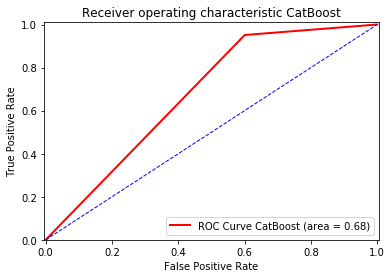

In [209]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure()

plt.plot(fpr_cat, tpr_cat, color='red', lw=2, label='ROC Curve CatBoost (area = %0.2f)' % AUC_cat)

#Random Guess line
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic CatBoost')
plt.legend(loc="lower right")

plt.show()

# Note!!
## CatBoost is not in the project report

I decided to leave CatBoost outside of the report because it yielded a terrible accuracy and the ROC curve was not ideal either. I tried to incorporate it at first after learning that it converts string values in the dataset by itself and normalizes the dataset on its own. I figured that the other two algorithms were underfitting the dataset and that's why they were not yielding a high accuracy. I assumed it was underfitting because PCA did not have better results. CatBoost would have included more features two allow more diversity between target types, in theory this should have had a higher accuracy, however it did not.